In [30]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Flatten, Dense
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import  ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [4]:
img_size = [200, 200]

In [17]:
num_classes=['downdog','goddess']

In [6]:
train_gen = ImageDataGenerator(rescale=1./255,
                               zoom_range=0.2,
                               horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

In [11]:


train_set = train_gen.flow_from_directory(directory=r'./DATASET/TRAIN',
                                          target_size=(200,200),
                                          batch_size=32,
                                          class_mode='binary')

test_set = test_gen.flow_from_directory(directory=r'./DATASET/TEST',
                                          target_size=(200,200),
                                          batch_size=32,
                                          class_mode='binary')



Found 403 images belonging to 2 classes.
Found 177 images belonging to 2 classes.


In [12]:
vgg16 = VGG16(input_shape = img_size + [3], weights='imagenet', include_top=False)

In [13]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [14]:
for layer in vgg16.layers:
  layer.trainable = False


In [15]:
x = Flatten()(vgg16.output)

In [18]:
prediction = Dense(len(num_classes), activation='softmax')(x)

# creat model object
model = Model(inputs = vgg16.input, outputs = prediction)

In [19]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)      

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [22]:
hist = model.fit(train_set, validation_data=test_set, epochs=5)

c:\users\chaku\appdata\local\programs\python\python38\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
13/13 [==============================] - 252s 19s/step - loss: 1.2057 - accuracy: 0.4913 - val_loss: 0.9741 - val_accuracy: 0.5367
Epoch 2/5
13/13 [==============================] - 280s 22s/step - loss: 0.8418 - accuracy: 0.5161 - val_loss: 0.7816 - val_accuracy: 0.4294
Epoch 3/5
13/13 [==============================] - 299s 23s/step - loss: 0.7520 - accuracy: 0.5062 - val_loss: 0.7333 - val_accuracy: 0.5367
Epoch 4/5
13/13 [==============================] - 306s 24s/step - loss: 0.7346 - accuracy: 0.4615 - val_loss: 0.7279 - val_accuracy: 0.4859
Epoch 5/5
13/13 [==============================] - 311s 24s/step - loss: 0.7176 - accuracy: 0.4789 - val_loss: 0.7081 - val_accuracy: 0.6215


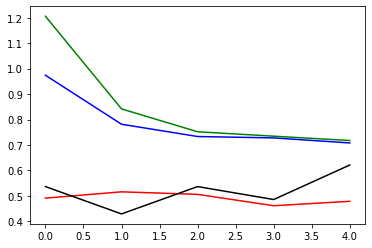

In [23]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [24]:
preds = model.predict(test_set)
preds = np.argmax(preds, axis=1)
preds

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1], dtype=int64)

In [37]:
img = keras.preprocessing.image.load_img(
    "test2.jpg", target_size=(200,200)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
preds = np.argmax(predictions, axis=1)
score = preds[0]
print(score)
# print(
#     "This image is %.2f percent downdog and %.2f percent goddess."
#     % (100 * (1 - score), 100 * score)
# )

1
